
## load data

In [1]:
import sys
import pandas as pd
import numpy as np
sys.path.append('/Users/shinbo/PycharmProjects/paper/LDA')

def print_top_words(lam, feature_names, n_top_words):
    for topic_id, topic in enumerate(lam):
        print('\nTopic Nr.%d:' % int(topic_id + 1))
        print(''.join([feature_names[i] + ' ' + str(round(topic[i], 2))
                       + ' | ' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
def TOP_N_WORDS_df(MODEL, TOP_N_WORDS, col_names):
    DMM_LDA_Top_words = pd.DataFrame()
    for i in range(4):
        temp = pd.DataFrame({'words':cv.get_feature_names(), 'lambda':MODEL.components_[i,:]})
        temp = temp.sort_values(by='lambda', ascending=False).iloc[:TOP_N_WORDS,:]
        DMM_LDA_Top_words[i] = temp['words'].tolist()
    DMM_LDA_Top_words.columns = col_names
    return DMM_LDA_Top_words

In [2]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

dir_ = '/Users/shinbo/Desktop/metting/LDA/paper/experiments/hotel/prepare/preproc.pkl'

data = pickle.load(open(dir_, 'rb'))
stop_words = ['hotel','stay','room','waikiki']
for i in range(len(data)):
    data[i] = [w for w in data[i] if w not in stop_words]

data_join = [' '.join(doc) for doc in data]
cv = CountVectorizer()
X = cv.fit_transform(data_join).toarray()

## DMM-LDA Result

In [3]:
dir_model = '/Users/shinbo/Desktop/metting/LDA/paper/experiments/hotel/model/DMM_result.pkl'
DMM_LDA = pickle.load(open(dir_model,'rb'))
TOP_N_WORDS = 100
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,5)])

DMM_LDA_lam =  [DMM_LDA.components_[k,:] for k in range(4)]
print_top_words(DMM_LDA_lam, list(cv.get_feature_names()), 20)


Topic Nr.1:
beach 1633.19 | get 1451.54 | staff 1404.28 | good 1375.08 | check 1360.6 | great 1269.18 | one 1198.33 | night 1151.11 | pool 1085.88 | go 1082.93 | location 1078.52 | time 1034.53 | nice 1007.71 | day 943.78 | clean 806.92 | place 787.86 | view 782.84 | service 782.84 | make 723.18 | breakfast 690.8 | 

Topic Nr.2:
beach 2104.17 | view 1721.39 | great 1610.8 | pool 1248.61 | staff 1181.51 | ocean 1001.74 | restaurant 907.77 | night 888.79 | nice 885.76 | location 816.43 | day 799.56 | get 776.69 | walk 775.95 | time 753.0 | well 736.47 | bed 735.27 | clean 717.82 | good 712.1 | tower 707.04 | go 701.05 | 

Topic Nr.3:
staff 1393.33 | great 850.57 | make 704.31 | time 685.75 | service 618.92 | night 589.28 | friendly 555.52 | clean 538.28 | go 511.63 | beach 480.51 | helpful 455.23 | view 451.87 | bed 448.41 | get 415.09 | place 414.32 | like 409.1 | nice 405.71 | back 398.09 | one 395.07 | day 394.75 | 

Topic Nr.4:
beach 4231.16 | great 4024.49 | staff 3452.91 | locatio

In [4]:
TOP_N_WORDS = 100
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,5)])

In [5]:
DMM_LDA_Top_words.iloc[:20,:]

,Topic 1,Topic 2,Topic 3,Topic 4
0,beach,beach,staff,beach
1,get,view,great,great
2,staff,great,make,staff
3,good,pool,time,location
4,check,staff,service,view
5,great,ocean,night,clean
6,one,restaurant,friendly,good
7,night,night,clean,walk
8,pool,nice,go,nice
9,go,location,beach,friendly


In [26]:
DMM_LDA.perplexity

[3997.602680638743,
 3310.303976890171,
 3308.050633475034,
 3307.817189562972,
 3307.7790328116425,
 3307.7575063189547,
 3307.7573885891857,
 3307.7554309519237,
 3307.7265073618746,
 3307.7265037552274]

## DMM-CLDA Result

In [7]:
dir_model = '/Users/shinbo/Desktop/metting/LDA/paper/experiments/hotel/model/CDMM_result.pkl'
DMM_CLDA = pickle.load(open(dir_model,'rb'))
DMM_CLDA_lam =  [DMM_CLDA.components_[k,:] for k in range(4)]
TOP_N_WORDS = 100
DMM_CLDA_Top_words = TOP_N_WORDS_df(DMM_CLDA, TOP_N_WORDS, ['price','food','drink','service'])
DMM_CLDA_Top_words.iloc[:20,]

,price,food,drink,service
0,price,restaurant,bar,staff
1,get,beach,drink,beach
2,beach,breakfast,cocktail,great
3,check,great,wine,location
4,rate,food,beer,friendly
5,expensive,view,beverage,view
6,money,pool,nibble,service
7,good,staff,alcoholic,clean
8,value,dinner,drinking,good
9,one,meal,tonic,nice


In [27]:
DMM_CLDA.perplexity

[5312.157321611085,
 4250.994982117806,
 4248.609339607975,
 4248.17269579065,
 4247.983014406924,
 4247.980029707097,
 4247.955951923405,
 4247.954716858862,
 4247.954584323888,
 4247.954584219408]

## source result

In [25]:
dir_model = '/Users/shinbo/Desktop/metting/LDA/paper/experiments/hotel/model/DMM_source_result.pkl'
DMM_source = pickle.load(open(dir_model,'rb'))
DMM_source_lam =  [DMM_source.components_[k,:] for k in range(4)]
TOP_N_WORDS = 100
DMM_source_Top_words = TOP_N_WORDS_df(DMM_source, TOP_N_WORDS, ['drink', 'food', 'price', 'service'])
DMM_source_Top_words.iloc[:20,][['price','food','drink','service']]

,price,food,drink,service
0,staff,food,beach,beach
1,great,beach,get,great
2,time,restaurant,check,staff
3,night,also,staff,view
4,make,great,great,location
5,service,use,one,good
6,go,pool,good,nice
7,view,day,pool,pool
8,clean,view,go,clean
9,beach,staff,night,walk


In [28]:
DMM_source.perplexity

[6910.476752204513,
 4393.570007715152,
 4391.971928124759,
 4391.777907189779,
 4391.700960299492,
 4391.698413914095]

In [12]:
dir_ = '/Users/shinbo/Desktop/metting/LDA/paper/experiments/hotel/prepare/source.pkl'
source = pickle.load(open(dir_,'rb'))
source.keys()

dict_keys(['drink', 'food', 'price', 'service'])

In [8]:
import pandas as pd
import numpy as np
from collections import Counter
def top_20_words_for_topics(CLDA_lam,CDMM, aux=None, n=50):
    if aux is True:
        K = len(CLDA_lam)-1
    else:
        K = len(CLDA_lam)
    words = {}
    unique_words = []
    for k in range(K):
        CLDA_lam_word = pd.DataFrame({'word':cv.get_feature_names(), 'lam':CDMM.components_[k,:] }).sort_values(by='lam', ascending=False)
        top_words = CLDA_lam_word.iloc[:n,:]['word'].tolist()
        words[k] = CLDA_lam_word.iloc[:n,:].set_index('word').to_dict()['lam']
        unique_words += top_words
        
    c = Counter(unique_words)
    words_all_appear = []
    for k,v in c.items():
        if v == K:
            words_all_appear.append(k)
    
    
    
    words_degree = []
    for k in range(K):
        for w,d in words[k].items():
            if w in words_all_appear:
                words_degree.append(d)
        
    return words_all_appear, len(set(unique_words)) / (K*n), len(set(unique_words)) , np.mean(words_degree)
words_, uq_words_ratio, uq_words_nums, asso_deg = top_20_words_for_topics(DMM_LDA_lam,DMM_LDA, n=50)
uq_words_ratio, uq_words_nums

(0.43, 86)

In [9]:
words_, uq_words_ratio, uq_words_nums, asso_deg = top_20_words_for_topics(DMM_CLDA_lam,DMM_CLDA, n=50)
uq_words_ratio, uq_words_nums

(0.535, 107)

In [10]:
words_, uq_words_ratio, uq_words_nums, asso_deg = top_20_words_for_topics(DMM_source_lam,DMM_source, n=50)
uq_words_ratio, uq_words_nums

(0.745, 149)

## n 변화시켜가며 비율 살펴보기

In [11]:
def varying_n(lam,mod):
    result = {}
    for n in range(10,51,10):
        words_, uq_words_ratio, uq_words_nums, asso_deg = top_20_words_for_topics(lam, mod, n=n)
        result[n] = (uq_words_ratio, uq_words_nums)
    return result

In [12]:
varying_n(DMM_LDA_lam,DMM_LDA)

{10: (0.575, 23),
 20: (0.4625, 37),
 30: (0.4166666666666667, 50),
 40: (0.4375, 70),
 50: (0.43, 86)}

In [13]:
varying_n(DMM_CLDA_lam,DMM_CLDA)

/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{10: (0.9, 36),
 20: (0.85, 68),
 30: (0.65, 78),
 40: (0.575, 92),
 50: (0.535, 107)}

In [14]:
varying_n(DMM_source_lam,DMM_source)

{10: (0.825, 33),
 20: (0.7625, 61),
 30: (0.75, 90),
 40: (0.74375, 119),
 50: (0.745, 149)}

In [15]:
DMM_source.perplexity

[15683.33882455813, 4862.665228800802, 4862.573836663506, 4862.573774702469]

## Glove 벡터 이용

In [12]:
n=0
glove_dir = '/Users/shinbo/Desktop/metting/LDA/paper/word_embedding/glove.6B/glove.6B.100d.txt'
word2glove = {}
with open(glove_dir, encoding="utf8") as f:

    for line in f:
        word_vector = line.split() # 각 줄을 읽어와서 word_vector에 저장.
        word = word_vector[0] # word_vector에서 첫번째 값만 저장
        word2glove[word] = np.array([float(i) for i in word_vector[1:]])

In [33]:
from scipy.spatial.distance import cosine
TOP_N_WORDS = 10
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,5)])
DMM_CLDA_Top_words = TOP_N_WORDS_df(DMM_CLDA, TOP_N_WORDS, ['price','service','food','accomodation'] )
DMM_source_Top_words = TOP_N_WORDS_df(DMM_source, TOP_N_WORDS, ['price','service','food','accomodation'])     

In [22]:
from itertools import combinations
# 하나의 토픽 내에서 nC2
# 큰 값이 좋은 것임
def cosine_sim(df):
    total = 0
    for col in df.columns:
        cos_val = 0
        words = df[col].tolist()
        for c in combinations(words,2):
#             print(c)
            cos_val += 1-cosine(word2glove[c[0]], word2glove[c[1]])
#             print(c)
#             print(cosine(word2glove[c[0]], word2glove[c[1]]))
        print(col, cos_val)
        total += cos_val
    print(total/4)
cosine_sim(DMM_LDA_Top_words)
print()
cosine_sim(DMM_CLDA_Top_words)

Topic 1 18.30634151716085
Topic 2 20.692595438908235
Topic 3 22.837739656762945
Topic 4 21.904842424916218
20.935379759437062

price 24.96277772064167
service 15.167980320395671
food 19.916207420563286
accomodation 18.910066678221664
19.739258034955572


In [23]:
# 토픽별로 cross similarity
# 작은 값이 좋은 것임
def cosine_sim_cross_topic(df):
    cols = list(df.columns)
    total = 0
    for col in cols:
        cos_val = 0
        target_words = df[col].tolist()
        rest_cols = list(set(cols) - set([col]))
        for not_col in rest_cols:
#             print(col, not_col)
            cross_words = df[not_col].tolist()
            for target_word in target_words:
                for cross_word in cross_words:
#                     print(target_word, cross_word)
                    cos_val += 1-cosine(word2glove[target_word],
                               word2glove[cross_word])
        print(col, cos_val)
        total += cos_val
    print(total/4)
cosine_sim_cross_topic(DMM_LDA_Top_words)
print()
cosine_sim_cross_topic(DMM_CLDA_Top_words)

Topic 1 139.9889984932741
Topic 2 146.08137672283598
Topic 3 146.14787236591397
Topic 4 145.0820424201924
144.32507250055409

price 102.36063631059497
service 103.70896641408386
food 100.42500140438251
accomodation 107.43641007958207
103.48275355216084


### word2vec 이용

In [14]:
import gensim

w2v_dir = '/Users/shinbo/Desktop/metting/LDA/paper/word_embedding/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin'
word2vec_model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format(
    w2v_dir, binary=True
)

In [15]:
from scipy.spatial.distance import cosine
TOP_N_WORDS = 100
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,5)])
DMM_CLDA_Top_words = TOP_N_WORDS_df(DMM_CLDA, TOP_N_WORDS, ['price','food','drink','service'] )
DMM_source_Top_words = TOP_N_WORDS_df(DMM_source, TOP_N_WORDS, ['drink', 'food', 'price', 'service'])     

In [29]:
# 하나의 토픽 내에서 nC2
# 큰 값이 좋은 것임
from collections import Counter
from itertools import combinations
from scipy.spatial.distance import cosine
N=20
def cosine_sim_w2v(df,N):
    df = df.iloc[:N,:]
    total = 0
    for col in df.columns:
        cos_val = 0
        words = df[col].tolist()
        for c in combinations(words,2):
#             print(c)
            try:
                cos_val += 1-cosine(word2vec_model.get_vector(c[0]),
                               word2vec_model.get_vector(c[1]))
            except:
                pass
#             print(c)
#             print(cosine(word2glove[c[0]], word2glove[c[1]]))
        print(col, cos_val)
        total += cos_val
    return total
result = cosine_sim_w2v(DMM_LDA_Top_words,N)
print(f'Mean: {result/4}')
print()
result = cosine_sim_w2v(DMM_CLDA_Top_words,N)
print(f'Mean: {result/4}')
print()
result = cosine_sim_w2v(DMM_source_Top_words,N)
print(f'Mean: {result/4}')

Topic 1 31.422694358276203
Topic 2 28.624239805852994
Topic 3 32.8285785370972
Topic 4 29.2586907541845
Mean: 30.533550863852724

price 30.533806861611083
food 46.421893528371584
drink 33.69151895621326
service 29.608605235582218
Mean: 35.063956145444536

drink 31.254484691889957
food 26.35529838805087
price 32.05942946462892
service 28.503534842049703
Mean: 29.543186846654862


In [35]:
# 토픽별로 cross similarity
# 작은 값이 좋은 것임
def cosine_sim_w2v_cross_topic(df):
    cols = list(df.columns)
    total = 0
    for col in cols:
        cos_val = 0
        target_words = df[col].tolist()
        rest_cols = list(set(cols) - set([col]))
        for not_col in rest_cols:
#             print(col, not_col)
            cross_words = df[not_col].tolist()
            for target_word in target_words:
                for cross_word in cross_words:
#                     print(target_word, cross_word)
                    cos_val += 1-cosine(word2vec_model.get_vector(target_word),
                               word2vec_model.get_vector(cross_word))
        print(col, cos_val)
        total += cos_val
    print(total)
cosine_sim_w2v_cross_topic(DMM_LDA_Top_words)
print()
cosine_sim_w2v_cross_topic(DMM_CLDA_Top_words)
print()
cosine_sim_w2v_cross_topic(DMM_source_Top_words)

Topic 1 57.16011403314769
Topic 2 58.74213494709693
Topic 3 52.35971114039421
Topic 4 55.431902976939455
223.6938630975783

price 31.277103207539767
service 39.33417551475577
food 35.5444508001674
accomodation 39.11769031314179
145.27341983560473

price 33.499387064250186
service 33.94938659033505
food 29.342106708092615
accomodation 37.30153795069782
134.09241831337567


## n=10,20,50,100

In [31]:
def topic_cross(df,N):
    df = df.iloc[:N,:]
    cols = list(df.columns)
    total = 0
    result = {}
    for col in cols:
        result[col] = {}
        rest_cols = list(set(cols) - set([col]))
        for word in df[col].tolist():
            # cosine sim within topic
            cos_val_intrinsic = 0
            for intra_word in list( set(df[col].tolist()) - set([word]) ):
                try:
                    cos_val_intrinsic += 1-cosine(word2vec_model.get_vector(word),
                           word2vec_model.get_vector(intra_word))
                except:
                    pass
            # cosin sim between topic
            max_cos_val_between = 1e-10
            for cross_col in rest_cols:
                cos_val_between = 0
                for cross_word in df[cross_col].tolist():
                    try:
                        cos_val_between += 1-cosine(word2vec_model.get_vector(word),
                               word2vec_model.get_vector(cross_word))
                    except:
                        pass
                if max_cos_val_between < cos_val_between:
                    max_cos_val_between = cos_val_between
            # compare within topic vs between topic
            if cos_val_intrinsic < max_cos_val_between:
                result[col][word] = 0
            else:
                result[col][word] = 1
    val = 0
#     print(result)
    for topic in result.keys():
        for word in result[topic].keys():
            val += result[topic][word]
#     print(val)
    return val

        
# topic_cross(DMM_LDA_Top_words,N=10)
# print()
# topic_cross(DMM_CLDA_Top_words,N=10)
# print()
topic_cross(DMM_source_Top_words,N=10)

0

In [32]:
result_LDA = pd.DataFrame()
for n in range(10,101,10):
    a = cosine_sim_w2v(DMM_LDA_Top_words,n)
    b = topic_cross(DMM_LDA_Top_words,n)
    row = [n,'DMM_LDA',a,b]
    result_LDA = pd.concat([result_LDA, pd.DataFrame(row).T])

result_CLDA = pd.DataFrame()
for n in range(10,101,10):
    a = cosine_sim_w2v(DMM_CLDA_Top_words,n)
    b = topic_cross(DMM_CLDA_Top_words,n)
    row = [n,'DMM_CLDA',a,b]
    result_CLDA = pd.concat([result_CLDA, pd.DataFrame(row).T])

result_source = pd.DataFrame()
for n in range(10,101,10):
    a = cosine_sim_w2v(DMM_source_Top_words,n)
    b = topic_cross(DMM_source_Top_words,n)
    row = [n,'DMM_source',a,b]
    result_source = pd.concat([result_source, pd.DataFrame(row).T])
    
result = pd.concat([result_LDA,result_CLDA,result_source])
result.columns = ['n','model','intrinsic','cross']

result['intrinsic'] = result['intrinsic'].astype(float)
result['cross'] = result['cross'].astype(float)

Topic 1 7.640535716898739
Topic 2 6.151866195490584
Topic 3 6.484835809096694
Topic 4 7.588791444897652
Topic 1 31.422694358276203
Topic 2 28.624239805852994
Topic 3 32.8285785370972
Topic 4 29.2586907541845
Topic 1 67.36444631894119
Topic 2 58.97734083310934
Topic 3 72.79534639022313
Topic 4 67.61800379795022
Topic 1 121.40021664556116
Topic 2 108.52468267799122
Topic 3 118.41357972845435
Topic 4 120.53225090331398
Topic 1 184.79988240648527
Topic 2 169.38500596833182
Topic 3 183.92746729645296
Topic 4 207.5147232444724
Topic 1 261.4280152095016
Topic 2 244.76845584687544
Topic 3 280.4619222149049
Topic 4 283.2271716193063
Topic 1 340.89327811740804
Topic 2 324.0627390013324
Topic 3 383.26909996739414
Topic 4 380.763341293321
Topic 1 446.6507009571651
Topic 2 421.50372419100313
Topic 3 487.5952042676654
Topic 4 481.25359086325625
Topic 1 575.7170201982954
Topic 2 546.9954640019714
Topic 3 605.2841615069046
Topic 4 582.9004007065523
Topic 1 697.9071955383406
Topic 2 683.1551205587602
T

In [33]:
df_diff_1 = pd.DataFrame({'n':[i for i in range(10,101,10)]})
df_diff_1['intrinsic'] = list(result_CLDA.iloc[:,2] - result_LDA.iloc[:,2])
df_diff_1['model'] = 'CLDA-LDA'

df_diff_2 = pd.DataFrame({'n':[i for i in range(10,101,10)]})
df_diff_2['intrinsic'] = list(result_CLDA.iloc[:,2] - result_source.iloc[:,2])
df_diff_2['model'] = 'CLDA-source'

df_diff = pd.concat([df_diff_1,df_diff_2])

<function matplotlib.pyplot.show(*args, **kw)>

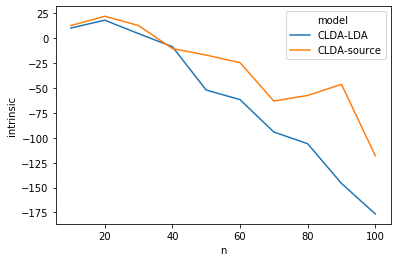

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='n',y='intrinsic',hue='model',data=df_diff)
plt.show

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

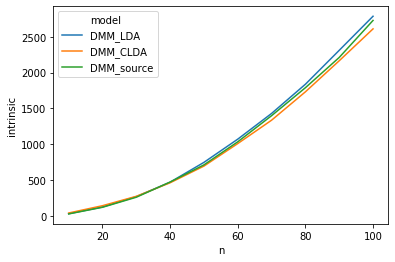

In [36]:
sns.lineplot(x='n',y='intrinsic',hue='model',data=result)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

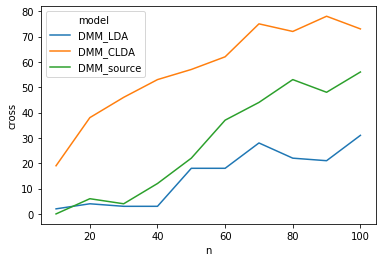

In [42]:
sns.lineplot(x='n',y='cross',hue='model',data=result)
plt.savefig('/Users/shinbo/Desktop/metting/LDA/paper/experiments/hotel/fig/BC.png')
plt.show

In [48]:
tick = pd.DataFrame()
tick['DMM_LDA'] = result[lambda x: x['model'] == 'DMM_LDA']['cross'].tolist()
tick['DMM_source'] = result[lambda x: x['model'] == 'DMM_source']['cross'].tolist()
tick['DMM_CLDA'] = result[lambda x: x['model'] == 'DMM_CLDA']['cross'].tolist()
tick['n'] = range(10,101,10)

In [49]:
tick

,DMM_LDA,DMM_source,DMM_CLDA,n
0,2.0,0.0,19.0,10
1,4.0,6.0,38.0,20
2,3.0,4.0,46.0,30
3,3.0,12.0,53.0,40
4,18.0,22.0,57.0,50
5,18.0,37.0,62.0,60
6,28.0,44.0,75.0,70
7,22.0,53.0,72.0,80
8,21.0,48.0,78.0,90
9,31.0,56.0,73.0,100


### 상대 도수

In [55]:
TOP_N_WORDS = 100
DMM_LDA_Top_words = TOP_N_WORDS_df(DMM_LDA, TOP_N_WORDS, [f'Topic {i}' for i in range(1,5)])
DMM_CLDA_Top_words = TOP_N_WORDS_df(DMM_CLDA, TOP_N_WORDS, ['price','service','food','accomodation'] )
DMM_source_Top_words = TOP_N_WORDS_df(DMM_source, TOP_N_WORDS, ['price','service','food','accomodation'])     

In [59]:
from collections import Counter
words = []
for review in data:
    words += review
words_counter = Counter(words)

<function matplotlib.pyplot.show(*args, **kw)>

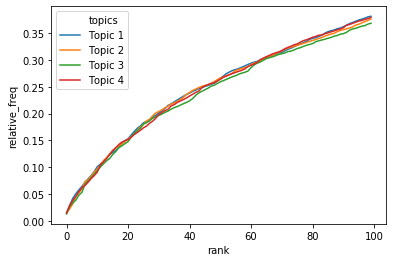

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
result = pd.DataFrame()
for column in DMM_LDA_Top_words.columns:
    temp = pd.DataFrame()
    words_ = DMM_LDA_Top_words[column].tolist()
    freq = []
    for word in words_:
        freq.append( words_counter[word] / len(words) )
    temp['relative_freq'] = np.cumsum(freq)
    temp['rank'] = [i for i in range(100)]
    temp['topics'] = column
    
    result = pd.concat([result,temp], axis=0)
    
sns.lineplot(x='rank',y='relative_freq',hue='topics',data=result)
plt.show

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
# result = pd.DataFrame()
for column in DMM_source_Top_words.columns:
    temp = pd.DataFrame()
    words_ = DMM_source_Top_words[column].tolist()
    freq = []
    for word in words_:
        freq.append( words_counter[word] / len(words) )
    temp['relative_freq'] = np.cumsum(freq)
    temp['rank'] = [i for i in range(100)]
    temp['topics'] = column
    
    result = pd.concat([result,temp], axis=0)
    
# sns.lineplot(x='rank',y='relative_freq',hue='topics',data=result)
# plt.show

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
# result = pd.DataFrame()
for column in DMM_CLDA_Top_words.columns:
    temp = pd.DataFrame()
    words_ = DMM_CLDA_Top_words[column].tolist()
    freq = []
    for word in words_:
        freq.append( words_counter[word] / len(words) )
    temp['relative_freq'] = np.cumsum(freq)
    temp['rank'] = [i for i in range(100)]
    temp['topics'] = column
    
    result = pd.concat([result,temp], axis=0)
    
# sns.lineplot(x='rank',y='relative_freq',hue='topics',data=result)
# plt.show
result['model'] = ['LDA']*400 + ['SLDA']*400 + ['CLDA']*400

In [105]:
model2topics = {
    'LDA':['Topic 1','Topic 2','Topic 3','Topic 4'],
    'SLDA':['price','food','service','accomodation'],
    'CLDA':['price','food','service','accomodation'],
}
colors = {
    'LDA':'black',
    'SLDA':'red',
    'CLDA':'blue',
}

No handles with labels found to put in legend.


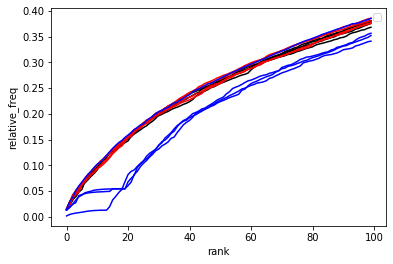

In [111]:
for model in model2topics.keys():
    color = colors[model]
    for topic in model2topics[model]:
        temp = result[lambda x: (x['model'] == model) & (x['topics'] == topic)]
        sns.lineplot(x='rank',y='relative_freq',data=temp, color=color)
plt.legend()